In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
train=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
test=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')

In [96]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [ ]:
train=train.drop(train.columns[0:2],1)
test=test.drop(test.columns[0:2],1)

In [ ]:
train.shape, test.shape

In [ ]:
train.describe()

In [ ]:
def get_cat(df):
    """Gets list of categorical features from passed dataframe"""
    cat=[]
    for i in df.columns:
        if df[i].dtypes=='object':
            cat.append(i) 
    return cat

In [ ]:
cat1=get_cat(train)
cat2=get_cat(test)

In [ ]:
train[train.isna().any(1)].shape

In [ ]:
test[test.isna().any(1)].shape

## handling missing nominal features

In [ ]:
def get_nom(df):
    """Gets nominal feature"""
    nom=[]
    for i in df.columns:
        if df[i].dtypes!='object':
            nom.append(i)
    return nom[2:]  # no need of feature id and age

In [ ]:
nom1=get_nom(train)
nom2=get_nom(test)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp=SimpleImputer(strategy='median')
# impute with median

In [ ]:
def impute(df, nom):
    "Impute for nan values"
    for i in nom:
        df[i]=imp.fit_transform(df[i][:, np.newaxis])
    return df

In [ ]:
train=impute(train, nom1)
test=impute(test, nom2)

In [ ]:
train[train.isna().any(1)].shape, test[test.isna().any(1)].shape
# no missing values

### Visulaization, lets look what our data intend to tell us

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def bar_plot(df,col):
    """Plot bar graph based on passed categorical features"""
    
    satisfied=df[col][df['satisfaction']=='satisfied'].value_counts()
    neutral=df[col][df['satisfaction']=='neutral or dissatisfied'].value_counts()
    dt=pd.DataFrame([satisfied,neutral], index=['satisfied','neutral or dissatisfied'])
    dt.plot.bar(stacked=True)

In [ ]:
bar_plot(train,'Class')

## feature encoding for categorical features

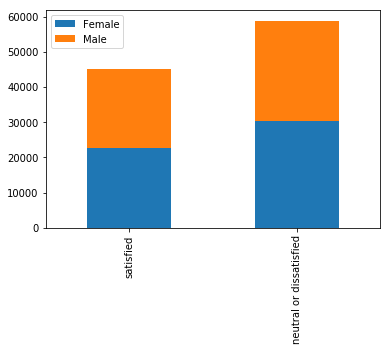

In [95]:
bar_plot(train, 'Gender')

In [ ]:
bar_plot(train, 'Type of Travel')

In [ ]:
cat1=cat1[0:4]
cat1=cat2[0:4]

In [ ]:
def cat_enc(df,cat):
    """Encoding (by get_dummies) for categorical features.
    Dropping the original feature before getting new dummy for each category in feature
    """
    dummies=[]
    for i in cat:
        dummies=pd.get_dummies(df[i], drop_first=True, prefix=i)
        df=df.drop(i,axis=1)
        df=pd.concat([df,dummies],1)
    return df

In [ ]:
train=cat_enc(train, cat1)
test=cat_enc(test, cat2)

In [ ]:
train.head(1)

In [ ]:
# encoding for our target feature (satisfaction)
train['satisfaction']=train['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})

In [ ]:
dtrain=train.copy()
dtest=test.copy()

## ML model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df_train.drop(['id','satisfaction'],1)
df_test=df_test.drop('id',1)
y=df_train['satisfaction']

In [ ]:
pipeline_train=make_pipeline((StandardScaler()), (RandomForestClassifier()))
pipeline_test=make_pipeline((StandardScaler()))

In [ ]:
pipeline_train.fit(X,y)
pipeline_test.fit(df_test)

In [ ]:
ypred=pipeline_train.predict(df_test.drop('satisfaction',1))
ypred.shape